In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import csv

# Inspecting data

In [2]:
train_file = 'train.csv'

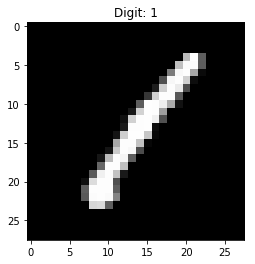

In [3]:
reader = csv.reader(open(train_file, 'r'))
# Skip header
next(reader, None)
for line in reader:
    label, *pixels = line
    pixels = np.array(pixels, dtype=np.int32)
    image = pixels.reshape((28,28))
    plt.figure()
    plt.title('Digit: {}'.format(label))
    plt.imshow(image, cmap='gray')
    break

# Training with images as 1D vectors

In [6]:
# Jupyter note: hold CTRL and click cursor in multiple locations to insert.
# hold ALT and drag cursor to select/insert in vertical lines of code.

def csv_to_data_matrix(csv_file, add_bias_unit=False):
    ''' Reads in a csv file path and
    returns a numpy.array of shape (N, 784 + 1 optional bias unit).'''
    reader = csv.reader(open(csv_file, 'r'))
    # Skip header
    next(reader, None)
    data = []
    labels = []
    for line in reader:
        label, *vector = line
        vector = np.array(vector, dtype=np.int32)
        if add_bias_unit:
            vector = np.hstack((vector, 1))
        data.append(vector)
        labels.append(label)
    return np.array(labels, dtype=np.int64), np.array(data, dtype=np.float32)

def get_random_batch(X, labels, batch_size):
    ''' An iterator over batches of
    size batch_size on data matrix X. '''
    n = len(X)
    while True:
        indices = np.random.permutation(n)[:batch_size]
        x_batch = X[indices]
        labels_batch = labels[indices]
        yield labels_batch, x_batch

def get_placeholders(x_size, num_classes=10, add_bias_unit=True, batch_size=None):
    ''' Returns tf.placeholders for batches of
    input data and labels.'''
    X = tf.placeholder("float", shape=[batch_size, x_size])
    y = tf.placeholder(tf.int64, shape=[batch_size])
    return X, y

def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def predict(X, x_size, y_size, h_size):
    ''' Predict the labels of data in the batch.'''
    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    h = tf.nn.relu(tf.matmul(X, w_1))
    logits = tf.matmul(h, w_2)
    
    return logits

def loss(logits, labels):
    ''' Return the loss on batch of labels and predictions.'''
    cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))
    return cost

def train_step(loss, learning_rate=0.001):
    ''' Return one training step (gradient descent) of size
    learning_rate that minimizes the loss.'''
    updates = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    return updates

def accuracy(logits, labels):
    ''' Return accuracy for batch given logits.'''
    predictions = tf.argmax(logits, 1)
    equality = tf.equal(predictions, labels)
    acc = tf.reduce_mean(tf.cast(equality, tf.float32))
    return acc

In [7]:
# Implementation of a simple MLP network with one hidden layer. Tested on the iris data set.
# Requires: numpy, sklearn>=0.18.1, tensorflow>=1.0

# NOTE: In order to make the code simple, we rewrite x * W_1 + b_1 = x' * W_1'
# where x' = [x | 1] and W_1' is the matrix W_1 appended with a new row with elements b_1's.
# Similarly, for h * W_2 + b_2
# Reference: https://gist.github.com/vinhkhuc/e53a70f9e5c3f55852b0




In [8]:
labels, X = csv_to_data_matrix(train_file, True)

In [9]:
add_bias_unit = True
x_size = 785 if add_bias_unit else 784
y_size = 10
h_size = 200
batch_size = 8

# Create computational graph in Tensorflow
batch_pl, labels_pl = get_placeholders(x_size, y_size, add_bias_unit, batch_size)
logits = predict(batch_pl, x_size, y_size, h_size)
batch_loss = loss(logits, labels_pl)
train_op = train_step(batch_loss)
batch_accuracy = accuracy(logits, labels_pl)

In [10]:
# Run training
batches = get_random_batch(X, labels, batch_size)
init = tf.global_variables_initializer()
i = 0
max_steps = 40000
with tf.Session() as sess:
    sess.run(init)        
    for batch in batches:
        labels_batch, x_batch = batch
        if i > max_steps:
            break
        # Single step of gradient descent on a batch
        _, _loss, _accuracy = sess.run([train_op, batch_loss, batch_accuracy],
                                     feed_dict={batch_pl: x_batch, labels_pl: labels_batch})
        if i % 500 == 0:
            print('Step: {}\tLoss: {}\tAccuracy: {}'.format(i, _loss, _accuracy))
        i += 1

Step: 0	Loss: 265.73992919921875	Accuracy: 0.125
Step: 500	Loss: 2.3025851249694824	Accuracy: 0.0
Step: 1000	Loss: 2.3025851249694824	Accuracy: 0.0
Step: 1500	Loss: 2.3025851249694824	Accuracy: 0.0
Step: 2000	Loss: 2.3025851249694824	Accuracy: 0.125
Step: 2500	Loss: 2.3025851249694824	Accuracy: 0.125
Step: 3000	Loss: 2.0147619247436523	Accuracy: 0.125
Step: 3500	Loss: 2.3025851249694824	Accuracy: 0.125
Step: 4000	Loss: 2.3025851249694824	Accuracy: 0.0
Step: 4500	Loss: 2.0147619247436523	Accuracy: 0.125
Step: 5000	Loss: 2.3025851249694824	Accuracy: 0.125
Step: 5500	Loss: 2.3025851249694824	Accuracy: 0.0
Step: 6000	Loss: 2.3025851249694824	Accuracy: 0.0
Step: 6500	Loss: 2.3025851249694824	Accuracy: 0.125
Step: 7000	Loss: 2.3025851249694824	Accuracy: 0.125
Step: 7500	Loss: 2.3025851249694824	Accuracy: 0.0
Step: 8000	Loss: 2.3025851249694824	Accuracy: 0.25
Step: 8500	Loss: 2.3025851249694824	Accuracy: 0.25
Step: 9000	Loss: 2.3025851249694824	Accuracy: 0.25
Step: 9500	Loss: 2.30258512496948

# Evaluating 1D vector model

# Saving submission to file

# Training CNN with 2D images

# Evaluating CNN

# Saving submission to file